In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [4]:
from fastai.imports import*

In [5]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [6]:
# import data
df = pd.read_csv('data/df_all.csv')

In [7]:
df_threshold = pd.read_csv('data/df_threshold.csv')

In [4]:
df.head(3)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,Alex Abrines,SG,24,OKC,75,8,1134,5.0,12.7,0.395,3.7,9.7,0.380,1.4,3.1,0.443,1.7,2.0,0.848,1.1,3.9,5.0,1.2,1.7,0.4,1.1,5.4,15.4,116.0,110.0,9.0,0.567,0.759,0.158,2.5,8.9,5.6,3.4,1.7,0.6,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1,2018
1,Quincy Acy,PF,27,BRK,70,8,1359,4.6,13.0,0.356,3.6,10.4,0.349,1.0,2.6,0.384,1.8,2.1,0.817,1.4,7.8,9.2,2.0,1.2,1.0,2.1,5.3,14.7,99.0,110.0,8.2,0.525,0.800,0.164,3.1,17.1,10.0,6.0,1.2,1.6,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1,2018
2,Steven Adams,C,24,OKC,76,76,2487,8.9,14.2,0.629,0.0,0.0,0.000,8.9,14.2,0.631,3.2,5.7,0.559,7.7,6.0,13.7,1.8,1.8,1.6,2.6,4.3,21.1,125.0,107.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3,2018


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 0 to 4758
Data columns (total 51 columns):
Player    4759 non-null object
Pos       4759 non-null object
Age       4759 non-null int64
Tm        4759 non-null object
G         4759 non-null int64
GS        4759 non-null int64
MP        4759 non-null int64
FG        4759 non-null float64
FGA       4759 non-null float64
FG%       4759 non-null float64
3P        4759 non-null float64
3PA       4759 non-null float64
3P%       4759 non-null float64
2P        4759 non-null float64
2PA       4759 non-null float64
2P%       4759 non-null float64
FT        4759 non-null float64
FTA       4759 non-null float64
FT%       4759 non-null float64
ORB       4759 non-null float64
DRB       4759 non-null float64
TRB       4759 non-null float64
AST       4759 non-null float64
STL       4759 non-null float64
BLK       4759 non-null float64
TOV       4759 non-null float64
PF        4759 non-null float64
PTS       4759 non-null float64
ORtg    

In [8]:
# change position, team, and year columns to categorical variables
df[['Pos', 'Tm', 'Year']] = df[['Pos', 'Tm', 'Year']].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 0 to 4758
Data columns (total 51 columns):
Player    4759 non-null object
Pos       4759 non-null category
Age       4759 non-null int64
Tm        4759 non-null category
G         4759 non-null int64
GS        4759 non-null int64
MP        4759 non-null int64
FG        4759 non-null float64
FGA       4759 non-null float64
FG%       4759 non-null float64
3P        4759 non-null float64
3PA       4759 non-null float64
3P%       4759 non-null float64
2P        4759 non-null float64
2PA       4759 non-null float64
2P%       4759 non-null float64
FT        4759 non-null float64
FTA       4759 non-null float64
FT%       4759 non-null float64
ORB       4759 non-null float64
DRB       4759 non-null float64
TRB       4759 non-null float64
AST       4759 non-null float64
STL       4759 non-null float64
BLK       4759 non-null float64
TOV       4759 non-null float64
PF        4759 non-null float64
PTS       4759 non-null float64
ORtg

In [10]:
# one-hot encode the data using pandas get_dummies
df = pd.get_dummies(df, columns = ['Pos', 'Tm', 'Year'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 0 to 4758
Columns: 106 entries, Player to Year_2018
dtypes: float64(43), int64(4), object(1), uint8(58)
memory usage: 2.0+ MB


In [12]:
# use numpy to convert to arrays
import numpy as np

# labels are the values we want to predict
y = np.array(df['WS/48'])

# remove the labels from the features
# axis 1 refers to the columns
X = df.drop(['Player','WS/48'], axis = 1)

# saving feature names for later use
feature_list = list(X.columns)

# convert to np array
X = np.array(X)

## Training and Testing Sets

In [13]:
# using Scikit-Learn to split data into train and test sets
from sklearn.model_selection import train_test_split

# splot the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [15]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (3331, 104)
Training Labels Shape: (3331,)
Testing Features Shape: (1428, 104)
Testing Labels Shape: (1428,)


## Scaling the Data

In [75]:
# scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest Regressor via Kaggle (see [here](https://www.kaggle.com/nsrose7224/random-forest-regressor-accuracy-0-91))

In [76]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

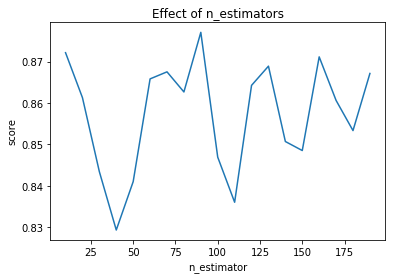

In [77]:
# try different number of n_estimators
estimators = np.arange(10, 200, 10)
scores = []

for n in estimators:
    model.set_params(n_estimators = n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
plt.title('Effect of n_estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores);

## fast.AI Random Forest Walkthrough

In [20]:
# define a function to check rmse value
def rmse(x, y):
    return np.sqrt(((x-y)**2).mean())

In [21]:
# def function to compare score from train and test sets, returning RMSE value and score for both data sets
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
          rmse(m.predict(X_test), y_test), 
          m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [24]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=10)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 670 ms, sys: 6.83 ms, total: 677 ms
Wall time: 317 ms
[0.009759764323595353, 0.03598556764323847, 0.9893664843807654, 0.8923545426064394]


## fast.AI Introduction to Bagging

In [65]:
m = RandomForestRegressor(n_jobs=-1, n_estimators = 40)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2.62 s, sys: 16.4 ms, total: 2.64 s
Wall time: 838 ms
[0.010162318902733994, 0.041273043335523375, 0.9884712067498946, 0.8583971550247604]


In [66]:
preds = np.stack([t.predict(X_test) for t in m.estimators_])

In [67]:
preds.shape

(40, 1428)

In [68]:
# returns 10 predictions for first row, mean of those predictions and the actual value from test set
preds[:,0], np.mean(preds[:,0]), y_test[0]

(array([0.1  , 0.084, 0.076, 0.076, 0.087, 0.082, 0.076, 0.084, 0.076,
        0.076, 0.066, 0.095, 0.097, 0.087, 0.082, 0.082, 0.069, 0.08 ,
        0.1  , 0.071, 0.101, 0.086, 0.086, 0.078, 0.08 , 0.084, 0.079,
        0.078, 0.087, 0.082, 0.068, 0.095, 0.084, 0.071, 0.091, 0.083,
        0.083, 0.087, 0.089, 0.083]), 0.083025, 0.085)

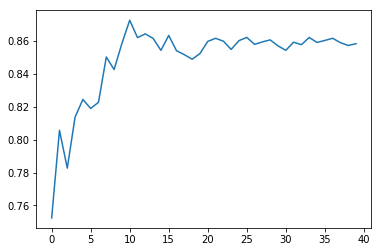

In [69]:
plt.plot([metrics.r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(40)]);

## Out-of-Bag (OOB) Score

In [71]:
# set oob_score = True to use data points which tree was not trained on
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2.65 s, sys: 19.2 ms, total: 2.67 s
Wall time: 960 ms
[0.009764085563116698, 0.04130540448118656, 0.9893570660917904, 0.8581750135781538, 0.8860553111162294]


## fast.ai `Min Sample Leaf`

- can be treated as stopping criteria for tree; stops splitting when number of samples in the leaf node is less than specified

In [73]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2.14 s, sys: 14.2 ms, total: 2.15 s
Wall time: 745 ms
[0.022410298800599877, 0.05007329316447374, 0.9439347831298421, 0.7915742844911418, 0.8743495224335299]


## fast.ai `Max feature`

- can use a subset of columns (features instead of using all the features, achieved by tweaking the `max_features` parameter

In [74]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True) 
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1.13 s, sys: 11.1 ms, total: 1.14 s
Wall time: 451 ms
[0.02514990776642982, 0.05472256423437796, 0.9293892205459569, 0.7510730766435607, 0.8711608814532273]


## Gradient Boosting in sklearn

In [37]:
# import the model we are using 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

# instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators = 300, max_depth = 1, random_state = 1)

# fit gbt to the training set
gbt.fit(X_train, y_train)

# predict the test set labels
y_pred = gbt.predict(X_test)

# evaluate the test set RMSE
rmse_test = np.sqrt(MSE(y_test, y_pred))

# print the test set RMSE
print('Test set RMSE: ', round(rmse_test, 5))

Test set RMSE:  0.03651


## Stochastic Gradient Boosting

In [38]:
# instantiate stochastic GradientBoostingRegressor
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state = 1)

# fit sgbt to training set
sgbt.fit(X_train, y_train)

# predict the test set labels
y_pred_sgbt = sgbt.predict(X_test)

In [40]:
# evaluate test set RMSE
rmse_test_sgbt = np.sqrt(MSE(y_test, y_pred_sgbt))

print('Test Set RMSE (SGBT): ', round(rmse_test_sgbt, 5))

Test Set RMSE (SGBT):  0.05891


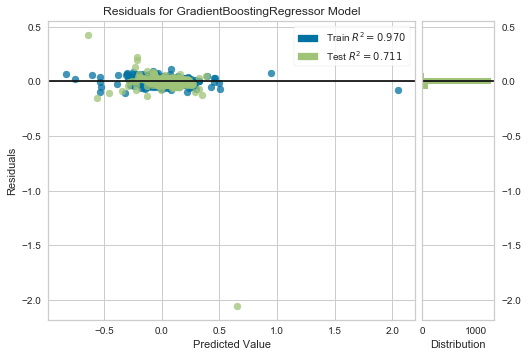

In [41]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(sgbt)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [ ]:
df.head(3)

In [ ]:
df.drop(labels = ['Player', 'Pos', 'Tm', 'Year'], axis = 1).head(5)

In [ ]:
# feature = minutes played
x_mp = df['MP']

# target value = win shares per 48 minutes
y = df['WS/48']

In [ ]:
# reshape x_mp and y
y = y.values.reshape(-1, 1)
x_mp = x_mp.values.reshape(-1, 1)

[Help with reshape](https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape)

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

In [ ]:
# fit the minutes played model
reg.fit(x_mp, y)

In [ ]:
# predict WS/48 using MP
mp_predict = reg.predict(x_mp)

from sklearn.metrics import mean_squared_error
mp_rmse = np.sqrt(mean_squared_error(mp_predict, y))

print(mp_rmse)

In [ ]:
print(reg.coef_)
print(reg.intercept_)

In [ ]:
plt.scatter(x_mp, y, color = 'red')
plt.plot(x_mp, reg.predict(x_mp), color = 'blue')
plt.show();

# `statsmodels`

In [ ]:
df.corrwith(df['WS/48']) > 0.50

In [ ]:
import statsmodels.api as sm

In [ ]:
x = df[['PTS', 'TS%']]
y = df['WS/48']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

In [ ]:
df.corrwith(df['WS/48']) > 0.5

In [ ]:
x = df[['FG', 'FG%', 'PTS', 'ORtg', 'PER', 'TS%']]
y = df['WS/48']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

In [ ]:
x = df[['FG', 'PTS', 'PER', 'TS%']]
y = df['WS/48']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

In [ ]:
df_threshold.corrwith(df_threshold['PER']) > 0.5

In [ ]:
df.head(1)

In [ ]:
df.drop(labels = ['Player', 'Age', 'Pos', 'Tm', 'Year', 'WS/48', 'WS', 'OWS', 'DWS'], axis = 1).head(2)

In [ ]:
x = df.drop(labels = ['Player', 'Age', 'Pos', 'Tm', 'Year', 'WS/48', 'WS', 'OWS', 'DWS'], axis = 1).values
y = df['WS/48'].values

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

# List of Resources So Far...

- [Linear Regression in Python using Scikit Learn](https://medium.com/@contactsunny/linear-regression-in-python-using-scikit-learn-f0f7b125a204)
- [pandas.DataFrane.corrwith](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html#pandas.DataFrame.corrwith)
- [statsmodels](https://datatofish.com/statsmodels-linear-regression/)
- [Predicting Win Shares](https://towardsdatascience.com/basketball-analytics-predicting-win-shares-7c155651e7cc)

## Linear Regression w/ scikit-learn

#### Features = `FG`, `PTS`, `PER`, `TS%`

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['FG', 'PTS', 'PER', 'TS%']]
y = df['WS/48']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

In [ ]:
# 5-fold cross validation
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

#### Regularization I: Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
X = df.drop(labels = ['Player', 'Age', 'Pos', 'Tm', 'Year', 'WS/48', 'WS', 'OWS', 'DWS'], axis = 1).values
y = df['WS/48'].values

# Create training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

names = df.drop(labels = ['Player', 'Age', 'Pos', 'Tm', 'Year', 'WS/48', 'WS', 'OWS', 'DWS'], axis = 1).columns

lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.figure(figsize = (14, 10))
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show();

In [ ]:
X = df[['FG', 'PTS', 'PER', 'TS%']]
y = df['WS/48']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
names = df[['FG', 'PTS', 'PER', 'TS%']].columns

lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.figure(figsize = (14, 10))
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show();

#### Regularization II: Ridge Regression

#### W/ `FG`, `PTS`, `PER`, `TS%`

In [ ]:
X = df[['FG', 'PTS', 'PER', 'TS%']]
y = df['WS/48']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [ ]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [ ]:
# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

In [ ]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

In [ ]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

#### Regularization II: Ridge Regression

#### W/ All features

In [ ]:
X = df.drop(labels = ['Player', 'Age', 'Pos', 'Tm', 'Year', 'WS/48', 'WS', 'OWS', 'DWS'], axis = 1).values
y = df['WS/48'].values

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [ ]:
# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

In [ ]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

In [ ]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

#### Hyperparameter tuning with GridSearchCV

In [ ]:
X = df.drop(labels = ['Player', 'Age', 'Pos', 'Tm', 'Year', 'WS/48', 'WS', 'OWS', 'DWS'], axis = 1)
y = df['WS/48']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# import necessary modules
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setup the hyperparameter grid
alpha_space = np.logspace(-4, 0, 50)
param_grid = {'alpha': alpha_space}

In [ ]:
# Create a ridge regressor: ridge
ridge = Ridge()

In [ ]:
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

In [ ]:
ridge_cv.fit(X, y)

In [ ]:
# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

### Pull Data from 2018-2019 Data to test model on

In [ ]:
# define function that will scrap information from basketball-reference.com and return information as a dataframe

def basketball_reference_scrap(year, statistic):
    # URL page we will be scraping 
    url = 'https://www.basketball-reference.com/leagues/NBA_{}_{}.html'.format(year, statistic)
    html = urlopen(url)
    soup = BeautifulSoup(html)
    headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
    # exclude the first column as we will not need the ranking order
    headers = headers[1:]
    rows = soup.findAll('tr')[1:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
    # create new dataframe
    df = pd.DataFrame(player_stats, columns = headers)
    df['Year'] = year
    return df


In [ ]:
def drop_duplicate_players(df):
    df.drop_duplicates(subset = 'Player', inplace=True)
    return df

In [ ]:
# function that cleans per possession data from web scrape

def clean_per_poss(df):
    '''function that accepts raw per possession data and cleans it into usable DataFrame'''
    # 1: drop duplicate players
    drop_duplicate_players(df)
    # 2: replace 'None' rows with 'NaN'
    df.fillna(value=pd.np.nan, inplace = True)
    # 3: drop rows with na
    df.dropna(axis = 0, inplace = True)
    # 4: drop blank column
    df.drop(labels = '', axis = 1, inplace = True)
    # 5: variable that contains columns to convert to numerics
    cols_to_numeric = df.columns.drop(['Player', 'Pos', 'Age', 'Tm', 'Year'])
    # 6: convert selected columns to numeric dtypes
    df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric, errors = 'coerce')
    # 7: reset index
    df.reset_index(drop = True, inplace = True)
    return df


In [ ]:
# function that cleans raw advanced stats pulled from web scrape 

def clean_advanced(df):
    '''function that takes in raw advanced data and cleans it into usable DataFrame'''
    #1: drop duplicate players
    drop_duplicate_players(df)
    #2: replace 'None' row with 'NaN'
    df.fillna(value=pd.np.nan, inplace = True)
    #3: dropna row
    df.dropna(axis=0, inplace=True)
    #4: drop blank columns
    df.drop(df.columns[[18, 23]], axis=1, inplace = True)
    #7: create list of columns to convert to numerics
    cols_to_numeric = df.columns.drop(['Player', 'Pos', 'Age', 'Tm', 'Year'])
    #8: convert selected columns to numeric dtypes
    df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric, errors = 'coerce')
    #9: reset_index
    df.reset_index(drop=True, inplace=True)
    #9: return updated df
    return df


In [ ]:
# function to merge and clean per possession and advanced dataframe

def merge_df(df1, df2):
    '''function to merge clean per_poss and advanced dataframe'''
    #1: merge df1 and df2
    df = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')
    #2: drop duplicate columns
    df.drop(labels = ['Year_x', 'Player_y', 'Pos_y', 'Age_y', 'Tm_y', 'G_y', 'MP_y'], axis = 1, inplace = True)
    #3: replace columns that still have '_x' and '_y'
    df.columns = df.columns.str.replace('_x', '').str.replace('_y', '')
    #4: print to confirm that all three df's have same number of rows
    print('Do all three DataFrames have the same number of rows? ',
         df1.shape[0] == df2.shape[0] == df.shape[0])
    #5: return merged df
    return df


In [ ]:
# import necessary modules
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
# scrap per_poss and advanced stats for year 2019
per_poss2019 = basketball_reference_scrap(2019, 'per_poss')
advanced2019 = basketball_reference_scrap(2019, 'advanced')

print('Shape of original DataFrames, Per_poss: ', per_poss2019.shape, 'Advanced: ', advanced2019.shape)

In [ ]:
clean_per_poss(per_poss2019);

In [ ]:
# clean up advanced 2019 stats
clean_advanced(advanced2019);

In [ ]:
df_2019 = merge_df(per_poss2019, advanced2019)

df_2019.head(5)

In [ ]:
df_2019.info()

In [ ]:
# percentage of the column with a missing value
df_2019.isnull().sum() / len(df_2019) * 100

In [ ]:
df_2019_test = df_2019.fillna(0)

df_2019_test.to_csv('data/df_2019.csv')

In [ ]:
# percentage of the column with a missing value
df_2019_test.isnull().sum() / len(df_2019_test) * 100

In [ ]:
per_qualify = df_2019_test['MP'] / df_2019_test['G'] >= 6.09

In [ ]:
# create dataframe that includes players that averaged at least 6.09 minutes per game
df_per_qualify = df_2019_test[per_qualify]
print('This is the shape of the original data frame: ', df_2019_test.shape)
print('This is the shape of the data frame with players that averaged at least 6.09 min/ game: ', df_per_qualify.shape)
print('We eliminated ', abs(df_2019_test.shape[0] - df_per_qualify.shape[0]) / (df_2019_test.shape[0]) * 100, '% of the observations.' )

## Ridge Regression w/ GridSearchCV & hold out set

In [ ]:
X = df.drop(labels = ['Player', 'Age', 'Pos', 'Tm', 'Year', 'WS/48', 'WS', 'OWS', 'DWS'], axis = 1)
y = df['WS/48']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
# Setup the hyperparameter grid
alpha_space = np.logspace(-4, 0, 50)
param_grid = {'alpha': alpha_space}

In [ ]:
# Create a ridge regressor: ridge
ridge = Ridge()

In [ ]:
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

In [ ]:
ridge_cv.fit(X_train, y_train)

In [ ]:
# Print the tuned parameters and score
print("Tuned test Ridge Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

In [ ]:
# Predict on the hold out set and compute metrics
y_pred = ridge_cv.predict(X_test)
r2 = ridge_cv.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))
print("Tuned Ridge Regression R squared: {}".format(r2))
print("Tuned Ridge Regression RMSE: {}".format(rmse))

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(ridge_cv)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

## ElasticNet Regression w/ GridSearchCV & train/test sets

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
def visual_gridsearch(model, X, y):
    alpha_space = np.logspace(-4, 0, 50)
    param_grid = {'alpha': alpha_space}
    ridge = Ridge()
    grid = GridSearchCV(ridge, param_grid=param_grid)
    grid.fit(X, y)

    scores = [x[1] for x in grid.grid_scores_]
    scores = np.array(scores).reshape(len(alpha_space))

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=ddlheatmap)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.title(
        "The best parameters are {} with a score of {:0.2f}.".format(
        grid.best_params_, grid.best_score_)
    )
    plt.show()

In [ ]:
visual_gridsearch()

In [ ]:
X_2019 = df_per_qualify.drop(labels = ['Player', 'Age', 'Pos', 'Tm', 'Year', 'WS/48', 'WS', 'OWS', 'DWS'], axis = 1)

In [ ]:
y_pred = ridge_cv.predict(X_2019)

In [ ]:
r2 = ridge_cv.score()

In [ ]:
from yellowbrick.regressor import ResidualsPlot

In [ ]:
visualizer = ResidualsPlot(ridge_cv, hist=False)
visualizer.score(X, df_per_qualify['WS/48'])